In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Dataset_a = sio.loadmat('HW9a.mat')

train_x_a = Dataset_a['train_X']
train_y_a = Dataset_a['train_y']
test_x_a = Dataset_a['test_X']
test_y_a = Dataset_a['test_y']



from sklearn import svm


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


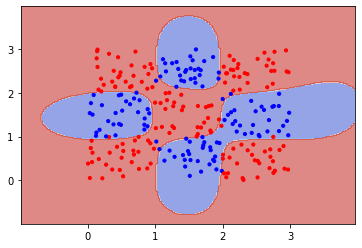

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [2]:
#select kernel function:{'rbf','poly'}
clf = svm.SVC(kernel='rbf',C=10,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = train_x_a[:,0], train_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

clf.predict(test_x_a)

## Linear Kernel

In [3]:
from sklearn.svm import SVC
import pandas as pd
X_train = train_x_a
y_train = train_y_a.reshape(-1)
X_test = test_x_a
y_test = test_y_a.reshape(-1)


C = np.arange(0.1,10,2)

scores = []
for c in C:
    svc_linear = SVC(kernel='linear', C=c)
    svc_linear.fit(X_train, y_train)
    score = svc_linear.score(X_test, y_test)
    scores.append(score)

df = pd.DataFrame({'C':C, 'Accuracy':scores})
df

,C,Accuracy
0,0.1,0.555556
1,2.1,0.555556
2,4.1,0.555556
3,6.1,0.555556
4,8.1,0.555556


The classes are not linearly separable thus the SVC with a linear kernel will not perform well. The scores are very low no matter the tuning of the hyperparameter C

## Polynomial Kernel

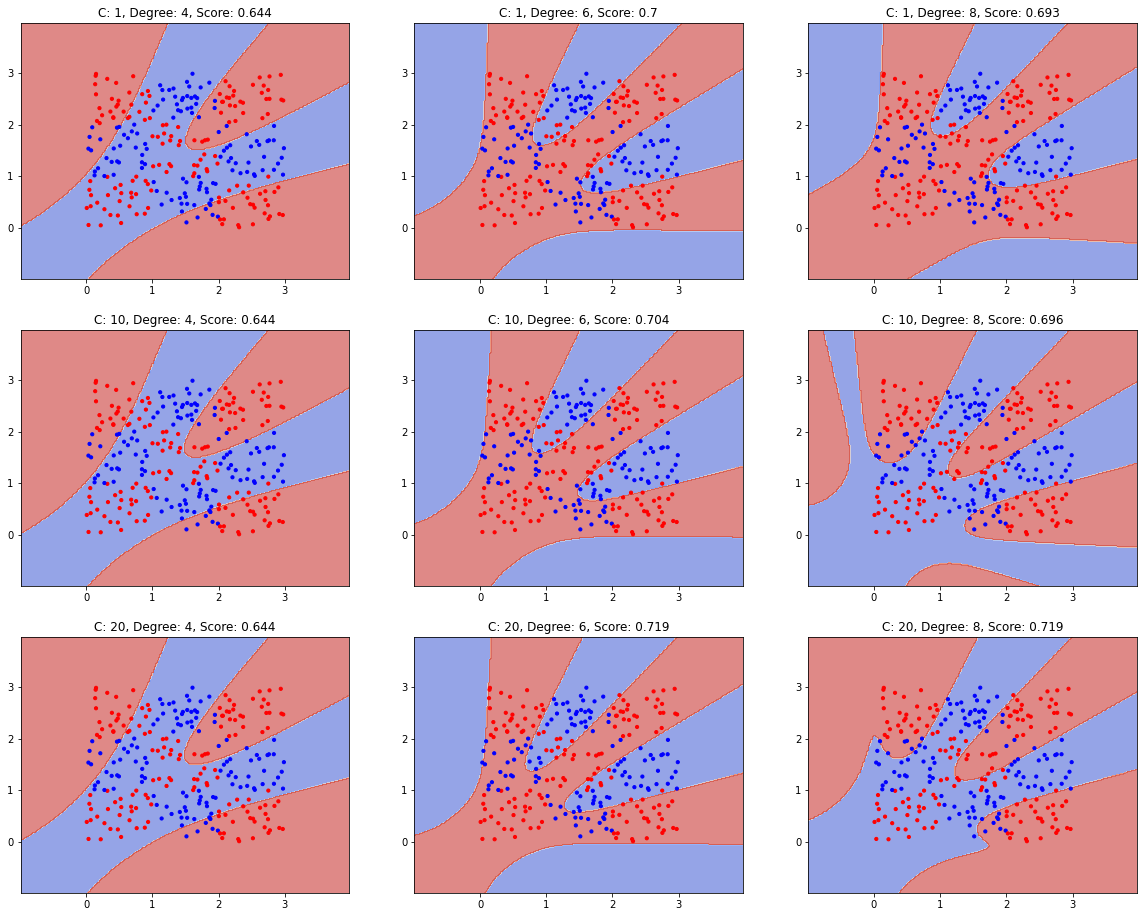

In [4]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_grid(X_train, y_train, clf, axs):
    X00, X11 = X_train[:,0], X_train[:,1]
    xx, yy = make_meshgrid(X00, X11)
    color= ['red' if l == 1 else 'blue' for l in y_train]
    plot_contours(axs, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.6)
    axs.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
    #plt.show()
    
fig, axs = plt.subplots(3,3, figsize=(20,16))

C = [1,10,20]
degrees = [4,6,8]

for i in range(len(C)):
    for j in range(len(degrees)):
        svc_poly = SVC(kernel='poly', C=C[i], degree=degrees[j])
        svc_poly.fit(X_train, y_train)
        score = svc_poly.score(X_test, y_test)
        plot_grid(X_train, y_train, svc_poly, axs[i][j])
        axs[i][j].title.set_text('C: ' + str(C[i]) + ', Degree: ' + str(degrees[j]) + ', Score: ' + str(round(score,3)) ) 

### Observations
* With a low degree of 4 we observe bias in the model
* While the degree grows to 8  we have overfitted the train data since the test score is decreasing
* The parameter C functions as a relaxation of misclassification. The smallest the value of C, the narrower the margins between the 2 classes

## RBF Kernel

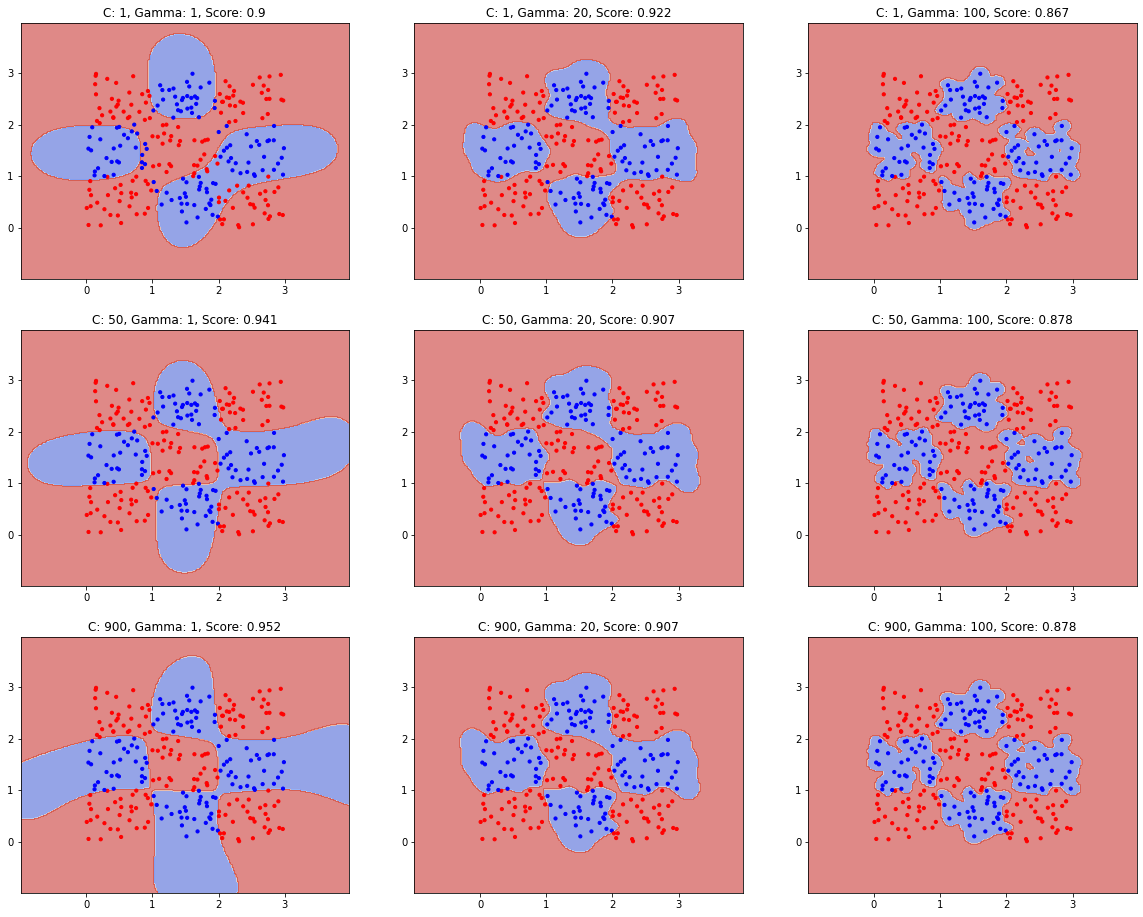

In [5]:
fig, axs = plt.subplots(3,3, figsize=(20,16))

C = [1,50,900]
gamma = [1,20,100]

for i in range(len(C)):
    for j in range(len(degrees)):
        svc_rbf = SVC(kernel='rbf', C=C[i], gamma=gamma[j])
        svc_rbf.fit(X_train, y_train)
        score = svc_rbf.score(X_test, y_test)
        plot_grid(X_train, y_train, svc_rbf, axs[i][j])
        axs[i][j].title.set_text('C: ' + str(C[i]) + ', Gamma: ' + str(gamma[j]) + ', Score: ' + str(round(score,3)) ) 

### Observations
* The RBF kernel was able to capture the pattern of the train set, since we observe the best scores out of all kernels
* The higher the value of C, the tighter the margins between the 2 classes
* The higher the gamma, the best fit to the train data. We observe overfitting when gamma is set to a very high value like in the middle and right columns